In [93]:
import pandas as pd

In [94]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [95]:
file = r'crypto_adj_close.csv'
data = pd.read_csv(file, index_col="Date", parse_dates=True)

In [96]:
# drop the USDS33039-USD and SUI20947-USD

data = data.drop(columns=['USDS33039-USD', 'SUI20947-USD'])

# drop the NaN values
data = data.dropna()

In [97]:
mu = expected_returns.mean_historical_return(data)
s = risk_models.sample_cov(data)

# **MAX SHARPE**

In [98]:
ef = EfficientFrontier(mu, s)

In [99]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from pypfopt import plotting


# fig, ax = plt.subplots()
# plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, show_fig=False)

# # Customize the plot
# ax.set_title('Efficient Frontier')
# ax.set_xlabel('Volatility (Standard Deviation)')
# ax.set_ylabel('Expected Return')

# plt.show()

In [100]:
max_sharpe = ef.max_sharpe()

In [101]:
cleaned_weights_max_sharpe = ef.clean_weights()

In [102]:
for i in cleaned_weights_max_sharpe:
    if cleaned_weights_max_sharpe[i] > 0:
        print(i, cleaned_weights_max_sharpe[i])

XRP-USD 0.11191
TRX-USD 0.01658
WBTC-USD 0.1228
WTRX-USD 0.34284
LEO-USD 0.40587


In [103]:
ef.portfolio_performance(verbose=True)

Expected annual return: 24.2%
Annual volatility: 34.7%
Sharpe Ratio: 0.64


(0.24165496391900657, 0.34653183671782173, 0.6396380950691655)

# **MAX SHARPE CFDS**

In [104]:
efshort = EfficientFrontier(mu, s, weight_bounds=(-1, 1))

In [105]:
msshort = efshort.max_sharpe()

In [106]:
cleaned_weights_max_return = efshort.clean_weights()

In [107]:
for i in cleaned_weights_max_return:
    if cleaned_weights_max_return[i] != 0:
         print(f"{i}: {cleaned_weights_max_return[i] * 10:.2f}%")

BTC-USD: 10.00%
ETH-USD: -10.00%
USDT-USD: -10.00%
BNB-USD: 5.92%
USDC-USD: 0.98%
XRP-USD: 4.98%
ADA-USD: -1.06%
SOL-USD: 2.79%
DOGE-USD: 0.78%
TRX-USD: 4.42%
TON-USD: -0.10%
MATIC-USD: -8.96%
DOT-USD: -8.41%
LTC-USD: 0.14%
AVAX-USD: -6.15%
WBTC-USD: 9.35%
DAI-USD: 2.32%
WTRX-USD: 0.49%
STETH-USD: -8.38%
LINK-USD: 5.65%
LEO-USD: 5.15%
XLM-USD: 1.40%
WSTETH-USD: 10.00%
HBAR-USD: -0.02%
SHIB-USD: -1.07%
BCH-USD: -0.23%


In [108]:
efshort.portfolio_performance(verbose=True)

Expected annual return: 170.3%
Annual volatility: 91.8%
Sharpe Ratio: 1.83


(1.7033595924458536, 0.9180735827852979, 1.8335780747974386)

In [109]:
expected_returns.mean_historical_return(data)

BTC-USD       0.191210
ETH-USD      -0.071960
USDT-USD     -0.000038
BNB-USD       0.100072
USDC-USD      0.000126
XRP-USD       0.296621
ADA-USD      -0.035058
SOL-USD       0.092991
DOGE-USD      0.077762
TRX-USD       0.346152
TON-USD      -0.676532
MATIC-USD    -0.357271
DOT-USD      -0.277611
LTC-USD      -0.031190
AVAX-USD     -0.272962
WBTC-USD      0.190502
DAI-USD       0.000008
WTRX-USD      0.346955
STETH-USD    -0.069369
LINK-USD      0.005320
LEO-USD       0.148760
XLM-USD       0.105456
WSTETH-USD   -0.046067
HBAR-USD     -0.016156
SHIB-USD     -0.143476
BCH-USD       0.026983
dtype: float64

In [110]:
expected_returns.ema_historical_return(data)

BTC-USD       4.551838e-01
ETH-USD      -1.693706e-01
USDT-USD      1.721549e-04
BNB-USD       2.721693e-01
USDC-USD     -2.044667e-05
XRP-USD       2.581936e+00
ADA-USD       1.167739e+00
SOL-USD       4.294270e-01
DOGE-USD      5.100242e-01
TRX-USD       9.597711e-01
TON-USD       2.019992e+14
MATIC-USD    -4.573855e-01
DOT-USD      -8.407014e-02
LTC-USD       3.546279e-01
AVAX-USD     -7.134438e-02
WBTC-USD      4.484231e-01
DAI-USD       1.866456e-04
WTRX-USD      9.578420e-01
STETH-USD    -1.668386e-01
LINK-USD      3.931137e-01
LEO-USD       6.270057e-01
XLM-USD       1.508514e+00
WSTETH-USD   -1.534320e-01
HBAR-USD      2.146957e+00
SHIB-USD      1.584486e-01
BCH-USD       2.633261e-01
Name: 2025-03-14 00:00:00+00:00, dtype: float64

In [111]:
expected_returns.capm_return(data)

BTC-USD       0.309454
ETH-USD       0.399035
USDT-USD      0.021113
BNB-USD       0.303095
USDC-USD      0.020708
XRP-USD       0.414104
ADA-USD       0.486831
SOL-USD       0.539407
DOGE-USD      0.464082
TRX-USD       0.252332
TON-USD       5.144528
MATIC-USD     0.512425
DOT-USD       0.446940
LTC-USD       0.401031
AVAX-USD      0.516089
WBTC-USD      0.308291
DAI-USD       0.021901
WTRX-USD      0.247274
STETH-USD     0.393692
LINK-USD      0.492368
LEO-USD       0.092288
XLM-USD       0.415283
WSTETH-USD    0.392768
HBAR-USD      0.488391
SHIB-USD      0.457828
BCH-USD       0.422956
Name: mkt, dtype: float64

In [112]:
expected_returns.returns_from_prices(data)

,BTC-USD,ETH-USD,USDT-USD,BNB-USD,USDC-USD,XRP-USD,ADA-USD,SOL-USD,DOGE-USD,TRX-USD,...,DAI-USD,WTRX-USD,STETH-USD,LINK-USD,LEO-USD,XLM-USD,WSTETH-USD,HBAR-USD,SHIB-USD,BCH-USD
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-06 00:00:00+00:00,-0.024888,-0.041201,-0.000031,-0.025624,0.000480,-0.038291,-0.048425,-0.056952,-0.033841,-0.024955,...,-0.000607,-0.023859,-0.033461,-0.048790,0.005541,-0.037385,-0.038261,-0.037419,-0.040000,-0.037067
2022-03-07 00:00:00+00:00,-0.009317,-0.022413,-0.000121,0.016889,-0.000717,-0.003729,-0.032016,-0.028532,-0.030315,-0.004073,...,0.000386,-0.006598,-0.022828,-0.046889,0.001628,-0.016808,-0.024038,0.019885,-0.041667,-0.028782
2022-03-08 00:00:00+00:00,0.017740,0.031619,0.000159,0.001610,0.001127,-0.003194,0.004855,0.001518,-0.000649,0.031765,...,0.000482,0.037411,0.032480,0.028695,0.048545,0.014860,0.030616,-0.008975,0.000000,0.034316
2022-03-09 00:00:00+00:00,0.083786,0.059391,0.000012,0.030362,0.000190,0.064162,0.059960,0.072303,0.038956,0.004906,...,-0.000102,-0.001465,0.059472,0.071755,0.028761,0.092713,0.058346,0.039275,0.043478,0.084324
2022-03-10 00:00:00+00:00,-0.060631,-0.044595,0.000271,-0.054368,-0.000649,-0.038803,-0.050603,-0.059670,-0.038680,-0.015976,...,-0.000064,-0.013599,-0.045051,-0.058517,-0.000382,-0.052829,-0.041665,0.017212,-0.041667,-0.059934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-10 00:00:00+00:00,-0.025670,-0.076585,-0.000053,-0.040496,0.000190,-0.054475,-0.066031,-0.064410,-0.081900,-0.010444,...,0.000149,-0.024228,-0.072323,-0.078432,0.001391,-0.077883,-0.067245,-0.049350,0.000000,-0.071616
2025-03-11 00:00:00+00:00,0.055139,0.031536,0.000096,0.036369,-0.000111,0.073637,0.074324,0.058941,0.065598,-0.022049,...,-0.000042,-0.021530,0.025051,0.032044,0.013864,0.052509,0.026613,0.033637,0.000000,0.023659
2025-03-12 00:00:00+00:00,0.010380,-0.005658,-0.000089,0.033402,-0.000165,0.034076,0.017793,0.010532,0.050041,-0.006376,...,0.000005,-0.010217,-0.006228,0.029198,-0.017567,0.017896,-0.012436,0.026317,0.000000,0.042611


In [113]:
from pypfopt import risk_models

In [114]:
risk_models.risk_matrix(data)

,BTC-USD,ETH-USD,USDT-USD,BNB-USD,USDC-USD,XRP-USD,ADA-USD,SOL-USD,DOGE-USD,TRX-USD,...,DAI-USD,WTRX-USD,STETH-USD,LINK-USD,LEO-USD,XLM-USD,WSTETH-USD,HBAR-USD,SHIB-USD,BCH-USD
BTC-USD,0.195914,0.210279,0.000635,0.149846,0.000366,0.179176,0.230599,0.269606,0.243708,0.098142,...,0.001006,0.096395,0.207350,0.219697,0.035229,0.173434,0.205837,0.208837,0.215823,0.211304
ETH-USD,0.210279,0.318553,0.000687,0.193583,0.000222,0.236907,0.301989,0.339850,0.299068,0.122446,...,0.001036,0.119147,0.315091,0.299006,0.041755,0.228741,0.313697,0.267390,0.265619,0.261399
USDT-USD,0.000635,0.000687,0.000041,0.000517,-0.000036,0.000538,0.000849,0.001032,0.000995,0.000341,...,-0.000032,0.000332,0.000668,0.000676,0.000239,0.000652,0.000668,0.000735,0.000940,0.000787
BNB-USD,0.149846,0.193583,0.000517,0.230874,0.000269,0.167447,0.215157,0.256523,0.218462,0.128629,...,0.001035,0.126275,0.190410,0.216227,0.030908,0.172363,0.188687,0.205123,0.193577,0.196465
USDC-USD,0.000366,0.000222,-0.000036,0.000269,0.000302,0.000105,0.000622,0.000541,0.000319,0.000395,...,0.000271,0.000492,0.000202,0.000350,-0.000044,0.000102,0.000234,0.000326,0.000451,0.000207
XRP-USD,0.179176,0.236907,0.000538,0.167447,0.000105,0.561552,0.392645,0.337830,0.295586,0.137036,...,0.001122,0.133026,0.233292,0.314159,0.042714,0.453382,0.233206,0.343126,0.266350,0.236967
ADA-USD,0.230599,0.301989,0.000849,0.215157,0.000622,0.392645,0.588431,0.431040,0.381109,0.166059,...,0.001682,0.163503,0.297806,0.397011,0.037808,0.372638,0.297483,0.365003,0.350952,0.304470
SOL-USD,0.269606,0.339850,0.001032,0.256523,0.000541,0.337830,0.431040,0.710266,0.389901,0.184730,...,0.001776,0.179369,0.333561,0.406892,0.050757,0.322795,0.333428,0.381360,0.371838,0.329208
DOGE-USD,0.243708,0.299068,0.000995,0.218462,0.000319,0.295586,0.381109,0.389901,0.625318,0.141609,...,0.001136,0.135501,0.293548,0.337539,0.049305,0.290903,0.291796,0.319008,0.462271,0.325050
TRX-USD,0.098142,0.122446,0.000341,0.128629,0.000395,0.137036,0.166059,0.184730,0.141609,0.400752,...,0.000826,0.392221,0.120667,0.148137,0.020518,0.144860,0.122169,0.172272,0.147434,0.146053


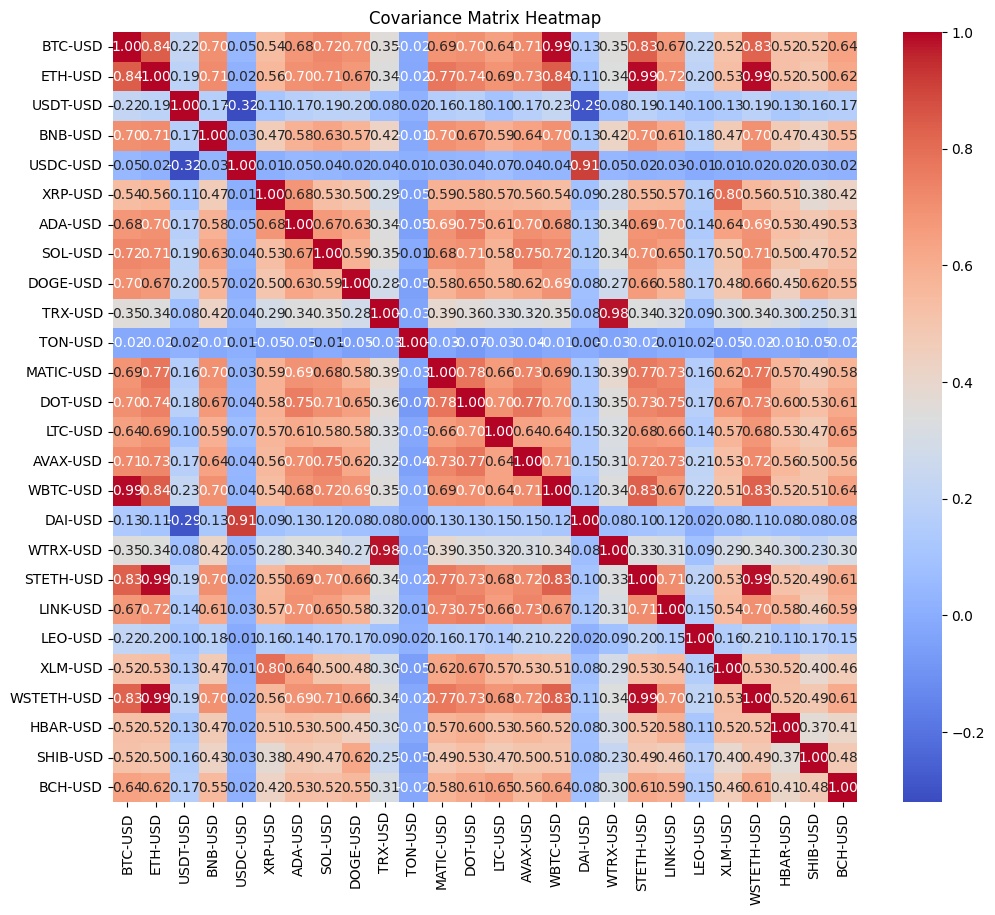

In [122]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(risk_models.cov_to_corr(s), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix Heatmap')
plt.show()

# **MAX RETURN CFDS**

In [116]:
mrs = EfficientFrontier(mu, s, weight_bounds=(-1, 1))

In [117]:
mrsw = mrs.max_quadratic_utility()

In [118]:
mrscw = mrs.clean_weights() # Max Returs Short Clean Weights

In [119]:
for i in mrscw:
    if mrscw[i] != 0:
         print(f"{i}: {mrscw[i] * 10:.2f}%")

BTC-USD: 10.00%
ETH-USD: -10.00%
USDT-USD: -10.00%
BNB-USD: 9.76%
USDC-USD: 4.64%
XRP-USD: 10.00%
ADA-USD: -3.48%
SOL-USD: 5.09%
DOGE-USD: 3.10%
TRX-USD: 7.03%
TON-USD: -0.16%
MATIC-USD: -10.00%
DOT-USD: -10.00%
LTC-USD: -1.40%
AVAX-USD: -10.00%
WBTC-USD: 10.00%
DAI-USD: -10.00%
WTRX-USD: 2.63%
STETH-USD: -10.00%
LINK-USD: 7.40%
LEO-USD: 10.00%
XLM-USD: 0.47%
WSTETH-USD: 7.84%
HBAR-USD: -0.53%
SHIB-USD: -2.86%
BCH-USD: 0.49%


In [121]:
mrs.portfolio_performance(verbose=True)

Expected annual return: 242.3%
Annual volatility: 135.4%
Sharpe Ratio: 1.77


(2.423315930924079, 1.3540263714826977, 1.7749402681813198)